In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx

/home/sanderg/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


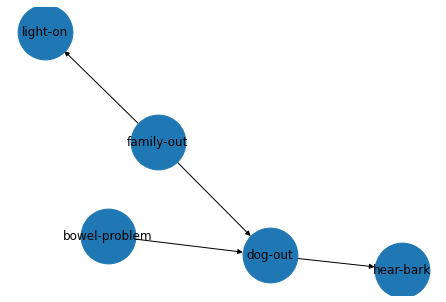

In [2]:
dog_network = BayesNet()
dog_network.load_from_bifxml('testing/dog_problem.BIFXML')
dog_network.draw_structure()
reasoner = BNReasoner(dog_network)

**D-Seperation example:**

There is no path between X and Y given Z, therefore it is d-seperated.


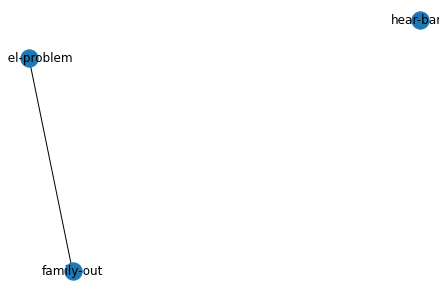

In [3]:
d_sep = reasoner.d_seperation(['family-out'], ['hear-bark'], ['dog-out'])
if d_sep:
    print("There is no path between X and Y given Z, therefore it is d-seperated.")
else:
    print("There is a path between X and Y given Z, therefore it is not guaranteed they are independent of each other .")

**Ordering examples:**

['light-on', 'hear-bark', 'bowel-problem', 'dog-out', 'family-out']
['light-on', 'bowel-problem', 'hear-bark', 'dog-out', 'family-out']


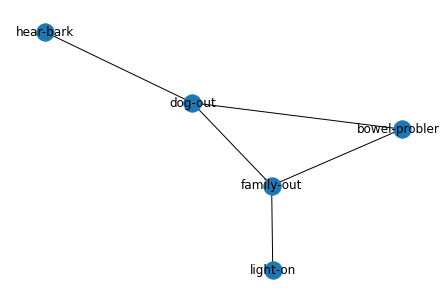

In [4]:
# Min_degree
nx.draw(dog_network.get_interaction_graph(), with_labels=True)
result_min_degree = reasoner.min_degree_order(dog_network.get_all_variables())
print(result_min_degree)
# Min_fill
result_min_fill = reasoner.min_fill_order(dog_network.get_all_variables())
print(result_min_fill)

**Pruning:**

{'bowel-problem':    bowel-problem     p
0          False  0.01
1           True  0.99, 'dog-out':    dog-out    p
0    False  0.9
1     True  0.1, 'family-out':    family-out     p
0       False  0.15
1        True  0.85}


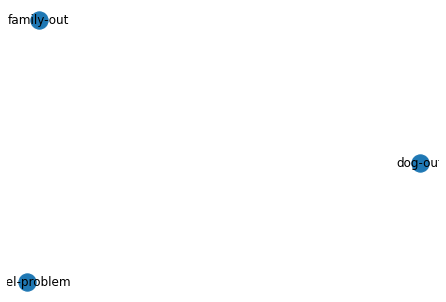

In [5]:
# pruned_graph, cpts = reasoner.prune_network(['dog-out'])
pruned_graph, cpts = reasoner.prune_network(['dog-out'], [('family-out', True), ('bowel-problem', False)])
nx.draw(pruned_graph, with_labels=True)
print(cpts)

**Marginal Distributions:**

,dog-out,p
0,False,0.40563
1,True,0.59437


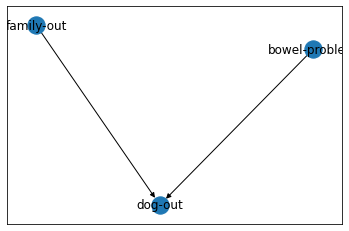

In [6]:
reasoner.prior_marginal(['dog-out'])